In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [28]:
dig= load_digits()
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__

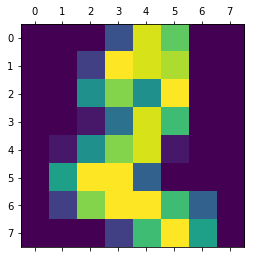

In [29]:
dig['target']
plt.gray
plt.matshow(dig.images[2])

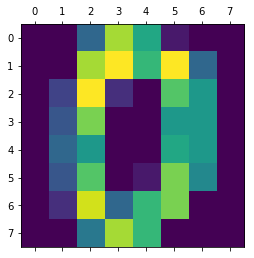

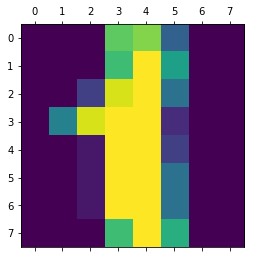

In [30]:
plt.gray
for i in range(2):
    plt.matshow(dig.images[i])

In [31]:
dig.data.shape

(1797, 64)

In [32]:
#create a dataframe with data and target columns
df = pd.DataFrame(dig.data)

In [33]:
df['target']= dig.target

In [34]:
df.head(8)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7


In [38]:
#now we have our dataset, now split it into train and test sets
from sklearn.model_selection import train_test_split
X= df.drop(['target'], axis =1)
Y= df.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [40]:
print(len(x_train))
print(len(x_test))

1437
360


In [55]:
from sklearn.ensemble import RandomForestClassifier
#lets create two models with different values of estimators and compare the accuracy
rn1 = RandomForestClassifier(n_estimators = 10)
rn1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
accuracy= rn1.score(x_test,y_test)

In [57]:
accuracy*100

91.94444444444444

In [54]:
rn2 = RandomForestClassifier(n_estimators = 20)
rn2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
accuracy= rn2.score(x_test,y_test)
accuracy*100

96.11111111111111

In [59]:
#The more tress we have in our random forest , the more higher accuracy we will achieve

In [63]:
#lets plot it in the form of an array
y_pred = rn2.predict(x_test)
con= confusion_matrix(y_test,y_pred)
con

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 34,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 34,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 30]], dtype=int64)

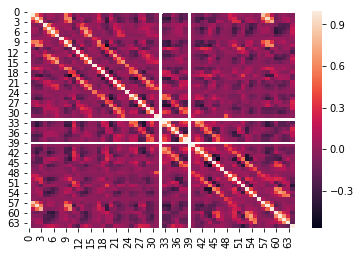

In [64]:
#lets plot a heatmap for better visualization
from sklearn.metrics import confusion_matrix
import seaborn as sn
sn.heatmap(df.corr())
#not that clear right!

Text(69.0, 0.5, 'True value')

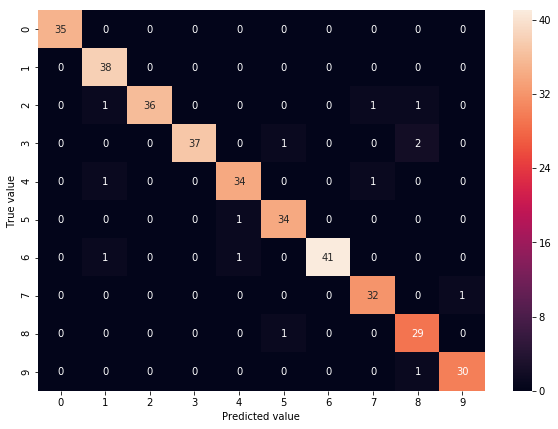

In [66]:
#not cool right!, we have another way
plt.figure(figsize= (10,7))
sn.heatmap(con,annot= True)
plt.xlabel('Predicted value')
plt.ylabel('True value')

In [ ]:
#It looks beautiful isn't it
#we can see that still there are some cases where out tree doesn't predicted well